# Chapitre 2

## Introduction

\draw[fill] (0.357143, 0.812214) circle (0.10);
\draw[fill] (0.948918, 1.143265) circle (0.10);
\draw[fill] (1.187496, 1.678099) circle (0.10);
\draw[fill] (1.777419, 1.333357) circle (0.10);
\draw[fill] (2.258380, 2.091978) circle (0.10);
\draw[fill] (3.509795, 2.169851) circle (0.10);
\draw[fill] (4.554073, 2.923194) circle (0.10);
\draw[domain=0:5.000000, smooth, variable=\x, red] 
     plot ({\x}, {0.788978 + \x * 0.454260});


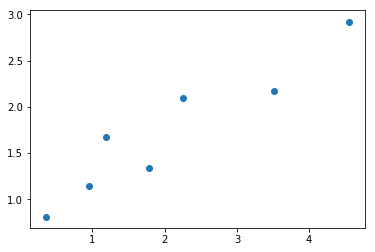

In [37]:
import numpy as np
import pylab as pl
from sklearn.linear_model import LinearRegression

f = lambda x: 0.4 + 3/5 * x
N = 7
xs = [5/7/2]
for i in range(N-1):
    xs.append(xs[i] + np.random.rand(1)[0] * 2 * 5 / 7)
ys = f(np.array(xs)) + np.random.rand(N)*1.2 - 0.6
for i in range(N):
    line = "\draw[fill] (%f, %f) circle (0.10);"
    print(line % (xs[i], ys[i]))

xp = [[a] for a in xs]
reg = LinearRegression().fit(xp, ys)
line = "\draw[domain=0:%f, smooth, variable=\\x, red] \n \
    plot ({\\x}, {%f + \\x * %f});"
print(line % (max(5, xs[-1]+0.2), reg.predict([[0]]), reg.coef_))

pl.scatter(xs, ys)
pl.show()

## Coefficient d'apprentissage

\draw[domain=1.181978:6.956124, smooth, variable=\x, blue] 
     plot ({\x}, {0.5 * (\x - 4)^2});
\draw[->, greenTikz] (2.000000, 2.000000) -- (3.500000, 0.125000);
\draw[->, red] (2.000000, 2.000000) -- (6.160000, 2.332800);
\draw[->, greenTikz] (3.500000, 0.125000) -- (3.875000, 0.007812);
\draw[->, red] (6.160000, 2.332800) -- (1.667200, 2.720978);
\draw[->, greenTikz] (3.875000, 0.007812) -- (3.968750, 0.000488);
\draw[->, red] (1.667200, 2.720978) -- (6.519424, 3.173749);


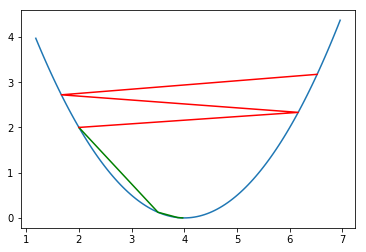

In [52]:
f = lambda x: 0.5*(x - 4)**2
fp = lambda x: (x - 4)

def descente(a, x0, n):
    res = [x0]
    for _ in range(n):
        res.append(res[-1] - a*fp(res[-1]))
    return res

N = 3
d1 = descente(0.75, 2, N)
d2 = descente(2.08, 2, N)
miX, maX = min(d1 + d2), max(d1 + d2)
xs = [miX + (maX - miX) * (i-10) / 100 for i in range(120)]
ys = f(np.array(xs))
y1s = f(np.array(d1))
y2s = f(np.array(d2))
line = "\draw[domain=%f:%f, smooth, variable=\\x, blue] \n \
    plot ({\\x}, {0.5 * (\\x - 4)^2});"
print(line % (xs[0], xs[-1]))
line = "\draw[->, %s] (%f, %f) -- (%f, %f);"
for i in range(N):
    print(line % ("greenTikz", d1[i], y1s[i], d1[i+1], y1s[i+1]))
    print(line % ("red", d2[i], y2s[i], d2[i+1], y2s[i+1]))

pl.plot(xs, ys)
pl.plot(d1, y1s, "g")
pl.plot(d2, y2s, "r")
pl.show()

## Régularisation

(0.342898, 0.939373)
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 0.758839 * cos(\t) + 0.110799 * sin(\t)}, {1.700000 + -0.276998 * cos(\t) + 0.303536 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 1.517678 * cos(\t) + 0.221598 * sin(\t)}, {1.700000 + -0.553996 * cos(\t) + 0.607071 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 2.276518 * cos(\t) + 0.332398 * sin(\t)}, {1.700000 + -0.830994 * cos(\t) + 0.910607 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 3.035357 * cos(\t) + 0.443197 * sin(\t)}, {1.700000 + -1.107992 * cos(\t) + 1.214143 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({10.800000 + 0.822338 * cos(\t) + 0.120071 * sin(\t)}, {1.700000 + -0.300177 * cos(\t) + 0.328935 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({10.800000 + 1.644677 * cos(\t) + 0.24

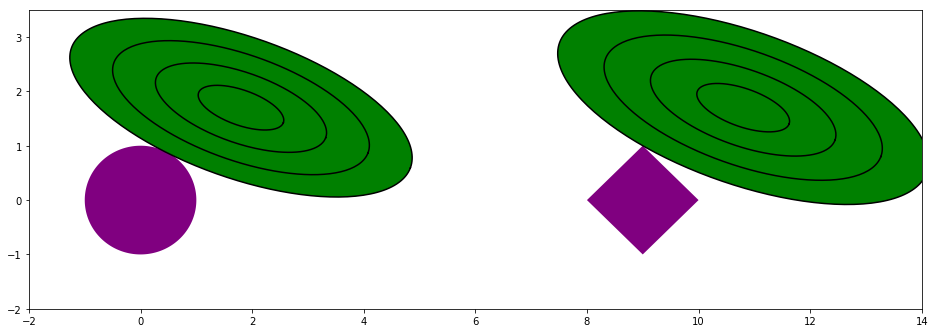

In [91]:
import numpy as np
import pylab as pl

theta = -0.35
scale = 0.4
c, s = np.cos(theta), np.sin(theta)
M = np.matrix([[c, -scale*s], [s, scale*c]])
x0, y0 = 1.8, 1.7
print("(%f, %f)" % (-s, c))
v = np.matrix([x0 + s, y0 - c]).T
vi = M.I @ v
d = (vi.T @ vi).A[0] ** 0.5
v = np.matrix([x0, y0-1]).T
vi = M.I @ v
d2 = (vi.T @ vi).A[0] ** 0.5

fig = pl.figure(figsize=(16, 5.5))
pl.xlim(-2, 14)
pl.ylim(-2, 3.5)
N = 100
a = np.array([np.pi * i / N for i in range(2*N+1)])
p = M @ np.array([np.cos(a), np.sin(a)])
curve = "\draw[domain=0:360, smooth, variable=\\t, very thick] \n \
    plot ({%f + %f * cos(\\t) + %f * sin(\\t)}, {%f + %f * cos(\\t) + %f * sin(\\t)});"
for sc in [d*(i+1)/4 for i in range(4)]:
    x = x0 + sc * p.A[0]
    y = y0 + sc * p.A[1]
    pl.plot(x, y, "black")
    print(curve % (x0, sc*M[0, 0], sc*M[0, 1], y0, sc*M[1, 0], sc*M[1, 1]))
pl.fill(x, y, "g")
for sc in [d2*(i+1)/4 for i in range(4)]:
    x = x0 + 9 + sc * p.A[0]
    y = y0 + sc * p.A[1]
    pl.plot(x, y, "black")
    print(curve % (x0 + 9, sc*M[0, 0], sc*M[0, 1], y0, sc*M[1, 0], sc*M[1, 1]))
pl.fill(x, y, "g")
pl.fill(np.cos(a), np.sin(a), "purple")
pl.fill([9, 8, 9, 10], [1, 0, -1, 0], "purple")
pl.show()

## Régression logistique

0.10679611650485427 [0.63106796]
30.138125854587635 -16.54720661231526


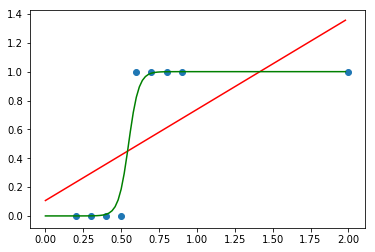

In [56]:
import numpy as np
import pylab as pl
from sklearn.linear_model import LinearRegression

x = np.array([0.2+0.1*i for i in range(8)] + [2])
y = [0]*4 + [1]*5
pl.scatter(x, y)
xs = np.array([0.02*i for i in range(100)])

reg = LinearRegression().fit(x.reshape(-1, 1), y)
l = reg.predict(xs.reshape(-1, 1))
pl.plot(xs, l, "r")
print(l[0], reg.coef_)

al = 0.02
a, b = 30, -16
def sig(x):
    return 1/(1+np.exp(-x))
for _ in range(1000):
    adda, addb = 0, 0
    for i in range(len(x)):
        diff = y[i] - sig(a*x[i]+b)
        adda += diff*x[i]
        addb += diff
    a += adda*al
    b += addb*al
print(a, b)
pl.plot(xs, [sig(a*w+b) for w in list(xs)], "g")

pl.show()

3.125167413324238 2.5371329852563402


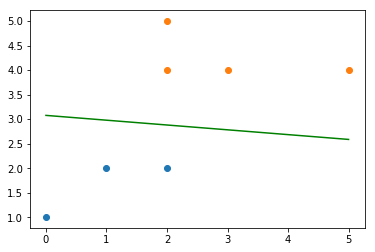

In [10]:
import pylab as pl

x = [0, 1, 2, 5, 3, 2, 2]
x2 = [1, 2, 2, 4, 4, 5, 4]
y = [0, 0, 0, 1, 1, 1, 1]
pl.scatter(x[:3], x2[:3])
pl.scatter(x[3:], x2[3:])

al = 0.02
a, b, c = 0.3, 3, -10
def sig(x):
    return 1/(1+np.exp(-x))
for _ in range(1000):
    adda, addb, addc = 0, 0, 0
    for i in range(len(x)):
        diff = y[i] - sig(a*x[i]+b*x2[i]+c)
        adda += diff*x[i]
        addb += diff*x2[i]
        addc += diff
    a += adda*al
    b += addb*al
    c += addc*al
def sep(x):
    return - (a*x + c) / b
pl.plot([0, 5], [sep(0), sep(5)], "g")
print(sep(-0.5), sep(5.5))

pl.show()

## Méthode de Newton

         4        3         2
-0.8577 x + 4.53 x - 7.303 x + 4.716 x - 0.686
\draw[fill, greenTikz] (1.800000, 0.000000) {$\bullet$};
\draw[fill, greenTikz] (1.800000, 1.559280) {$\bullet$};
\draw[fill, greenTikz] (1.164304, 0.000000) {$\bullet$};
\draw[fill, greenTikz] (1.164304, 0.479580) {$\bullet$};
\draw[fill, greenTikz] (0.498177, 0.000000) {$\bullet$};
\draw[fill, greenTikz] (0.498177, 0.358360) {$\bullet$};


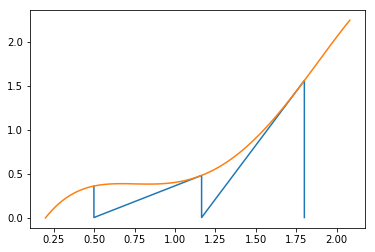

In [45]:
import numpy as np
import pylab as pl
from scipy.interpolate import lagrange

x = [0.2, 0.4, 1, 1.6, 2.7]
y = [0, 0.3, 0.4, 1.1, 2.4]
#pl.scatter(x, y, color='g')
P = lagrange(x, y)
dP = P.deriv(1)
print(P)

a = [1.8] * 2
b = [0, P(a[0])]
for _ in range(2):
    a += [a[-1] - P(a[-1]) / dP(a[-1])] * 2
    b += [0, P(a[-1])]
line = "\draw[greenTikz] (%f, %f) node {$\\bullet$};"
for i in range(len(a)):
    print(line % (a[i], b[i]))
pl.plot(a, b)

e, d = min(a)-0.3, max(a) - min(a) + 0.6
xs = np.array([e + d/100*i for i in range(100)])
pl.plot(xs, P(xs))

pl.show()

# Chapitre 3

## KNN

\draw[blue] (0.626252, 0.819381) node {$\bullet$};
\draw[red] (0.500000, 0.500000) circle (0.343429);
\draw[blue] (2.626252, 0.819381) node {$\bullet$};
\draw[blue] (2.766462, 0.208311) node {$\bullet$};
\draw[blue] (2.265342, 0.502120) node {$\bullet$};
\draw[blue] (2.555533, 0.427031) node {$\bullet$};
\draw[blue] (2.403969, 0.184887) node {$\bullet$};
\draw[blue] (2.720170, 0.620170) node {$\bullet$};
\draw[blue] (2.899990, 0.885093) node {$\bullet$};
\draw[blue] (2.759190, 0.760827) node {$\bullet$};
\draw[blue] (2.378418, 0.014533) node {$\bullet$};
\draw[blue] (2.471300, 0.483678) node {$\bullet$};
\draw[blue] (2.245568, 0.344532) node {$\bullet$};
\draw[blue] (2.455625, 0.462233) node {$\bullet$};
\draw[blue] (2.229553, 0.741057) node {$\bullet$};
\draw[blue] (2.905409, 0.670901) node {$\bullet$};
\draw[blue] (2.151966, 0.686839) node {$\bullet$};
\draw[blue] (2.407978, 0.621513) node {$\bullet$};
\draw[red] (2.500000, 0.500000) circle (0.152425);
\draw[blue] (4.626252, 0.819381

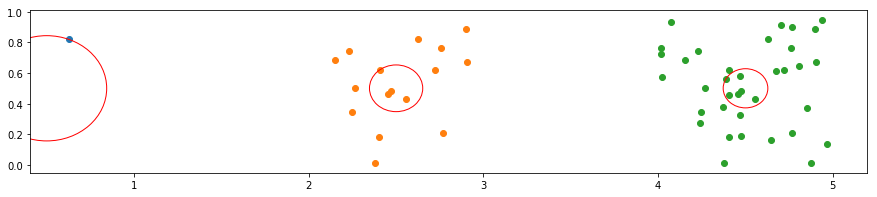

In [28]:
import numpy as np
import pylab as pl

pl.figure(figsize=(15, 3))

l = [1, 4, 6]
ps = np.random.rand(l[-1]**2, 2)
for i in range(3):
    n = l[i]
    a = ps[:n**2]
    a = [[x[0]+i*2, x[1]] for x in a]
    for x in a:
        print("\draw[blue] (%f, %f) node {$\\bullet$};" % (x[0], x[1]))
    c = [i*2+0.5, 0.5]
    r = sorted([(x[0]-c[0])**2 + (x[1]-c[1])**2 for x in a])[n-1] ** 0.5
    print("\draw[red] (%f, %f) circle (%f);" % (c[0], c[1], r))
    cir = pl.Circle(c, r, color='r', fill=False)
    pl.gcf().gca().add_artist(cir)
    pl.scatter([x[0] for x in a], [x[1] for x in a])

pl.show()

## Loi normale

\draw[blue] (11.000000, 0.006779) -- (11.100000, 0.007873) -- (11.200000, 0.009383) -- (11.300000, 0.011256) -- (11.400000, 0.013063) -- (11.500000, 0.016750) -- (11.600000, 0.021479) -- (11.700000, 0.025188) -- (11.800000, 0.029294) -- (11.900000, 0.037798) -- (12.000000, 0.048504) -- (12.100000, 0.070106) -- (12.200000, 0.086664) -- (12.300000, 0.091432) -- (12.400000, 0.105619) -- (12.500000, 0.131789) -- (12.600000, 0.167379) -- (12.700000, 0.199576) -- (12.800000, 0.179463) -- (12.900000, 0.215490) -- (13.000000, 0.235025) -- (13.100000, 0.261005) -- (13.200000, 0.258727) -- (13.300000, 0.331118) -- (13.400000, 0.342982) -- (13.500000, 0.399206) -- (13.600000, 0.327205) -- (13.700000, 0.435013) -- (13.800000, 0.328604) -- (13.900000, 0.399489) -- (14.000000, 0.392978) -- (14.100000, 0.391679) -- (14.200000, 0.412969) -- (14.300000, 0.361395) -- (14.400000, 0.391842) -- (14.500000, 0.364244) -- (14.600000, 0.314217) -- (14.700000, 0.335372) -- (14.800000, 0.258383) -- (14.900000, 0

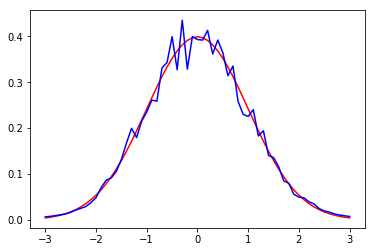

In [42]:
import numpy as np
import pylab as pl

mulnor = 1 / np.sqrt(2*np.pi)
def nor(x):
    return mulnor * np.exp(-0.5 * x**2)

N = 60
xs = np.array([i/60 for i in range(N+1)]) * 6 - 3
y0 = nor(xs)
m = 10000
k = int(m**0.5)
s = np.random.normal(0, 1, m)
def nor2(x):
    return 1 / sorted(abs(s - x))[k-1]
y = [nor2(x) for x in xs]
mul = sum(y0) / sum(y)
y = [mul*v for v in y]
line = "\draw[blue]"
for i in range(N+1):
    line += " (%f, %f) --" % (14+xs[i], y[i])
print(line)

pl.plot(xs, y0, "r")
pl.plot(xs, y, "b")
pl.show()

## Facteur k

\draw[] (0.000000, 0.000000) -- (0.016667, 0.032778) -- (0.033333, 0.064444) -- (0.050000, 0.095000) -- (0.066667, 0.124444) -- (0.083333, 0.152778) -- (0.100000, 0.180000) -- (0.116667, 0.206111) -- (0.133333, 0.231111) -- (0.150000, 0.255000) -- (0.166667, 0.277778) -- (0.183333, 0.299444) -- (0.200000, 0.320000) -- (0.216667, 0.339444) -- (0.233333, 0.357778) -- (0.250000, 0.375000) -- (0.266667, 0.391111) -- (0.283333, 0.406111) -- (0.300000, 0.420000) -- (0.316667, 0.432778) -- (0.333333, 0.444444) -- (0.350000, 0.455000) -- (0.366667, 0.464444) -- (0.383333, 0.472778) -- (0.400000, 0.480000) -- (0.416667, 0.486111) -- (0.433333, 0.491111) -- (0.450000, 0.495000) -- (0.466667, 0.497778) -- (0.483333, 0.499444) -- (0.500000, 0.500000);
\draw[] (0.000000, 0.000000) -- (0.016667, 0.017463) -- (0.033333, 0.036375) -- (0.050000, 0.056525) -- (0.066667, 0.077709) -- (0.083333, 0.099730) -- (0.100000, 0.122400) -- (0.116667, 0.145537) -- (0.133333, 0.168968) -- (0.150000, 0.192525) -- (0

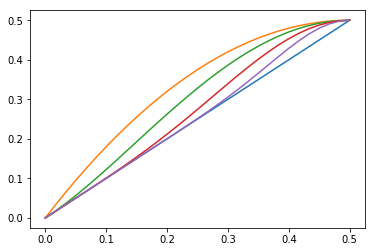

In [57]:
import numpy as np
import pylab as pl

N = 30
pl.plot([0, 0.5], [0, 0.5])
xs = [i / N / 2 for i in range(N+1)]
for k in [1, 3, 9, 27]:
    y = []
    for x0 in xs:
        e = 0
        for x in [x0, 1-x0]:
            f, invf = 1, 1
            for i in range(k // 2 + 1):
                e += x * (invf / f) * (1-x)**i * x**(k-i)
                f *= (i+1)
                invf *= (k-i)
        y.append(1-e)
    pl.plot(xs, y)
    line = "\draw[]"
    for i in range(N+1):
        line += " (%f, %f) --" % (xs[i], y[i])
    print(line[:-3] + ";")

pl.show()

# Chapitre 4

## Exemple simple PCA

\draw[purple] (0, -0.846) -- (8, 3.804);
\draw[greenTikz] (0.491, 0.039) -- (0.751, -0.409);
\draw[fill=red] (0.491, 0.039) circle (0.15);
\draw[fill=greenTikz] (0.751, -0.409) circle (0.15);
\draw[greenTikz] (3.370, 0.587) -- (3.141, 0.980);
\draw[fill=red] (3.370, 0.587) circle (0.15);
\draw[fill=greenTikz] (3.141, 0.980) circle (0.15);
\draw[greenTikz] (1.769, -0.248) -- (1.582, 0.073);
\draw[fill=red] (1.769, -0.248) circle (0.15);
\draw[fill=greenTikz] (1.582, 0.073) circle (0.15);
\draw[greenTikz] (5.370, 3.037) -- (5.701, 2.468);
\draw[fill=red] (5.370, 3.037) circle (0.15);
\draw[fill=greenTikz] (5.701, 2.468) circle (0.15);
\draw[greenTikz] (6.241, 2.376) -- (6.064, 2.679);
\draw[fill=red] (6.241, 2.376) circle (0.15);
\draw[fill=greenTikz] (6.064, 2.679) circle (0.15);


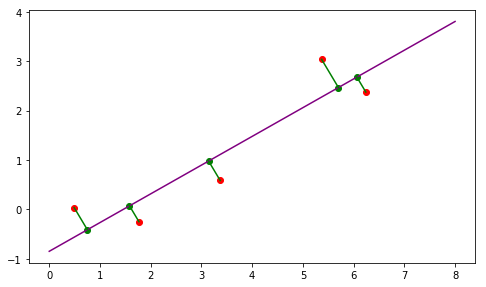

In [70]:
import pylab as pl
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

v = np.array([2, 1])
v = v / np.linalg.norm(v)
ort = np.array([-v[1], v[0]])
ps = np.array([np.random.rand()*8*v + (np.random.rand()-0.5)*4*ort for _ in range(5)])

mean = sum(ps) / len(ps)
pca = PCA(n_components=1).fit(ps)
v2 = pca.components_[0]
ort2 = np.array([-v2[1], v2[0]])

ymin, ymax = mean[1] + (np.array([0, 8]) - mean[0])/v2[0]*v2[1]
print("\draw[purple] (0, %.3f) -- (8, %.3f);" % (ymin, ymax))
pl.figure(figsize=(8, ymax-ymin))
x, y = ps.transpose()
pl.scatter(x, y, c='red')
pl.plot([0, 8], [ymin, ymax], c="purple")
for p in ps:
    pp = p - (p.dot(ort2) - mean.dot(ort2)) * ort2
    x, y = np.array([p, pp]).transpose()
    pl.scatter([pp[0]], [pp[1]], color='green')
    pl.plot(x, y, color="green")
    print("\draw[greenTikz] (%.3f, %.3f) -- (%.3f, %.3f);" % (p[0], p[1], pp[0], pp[1]))
    print("\draw[fill=red] (%.3f, %.3f) circle (0.15);" % (p[0], p[1]))
    print("\draw[fill=greenTikz] (%.3f, %.3f) circle (0.15);" % (pp[0], pp[1]))
pl.show()

## Outliers

\draw[greenTikz, very thick] (0, 0.398) -- (7.155, 3.133);
\draw[blue, very thick] (0, 0) -- (7.155, 3.578);
\draw[fill=red] (1.947, 0.973) circle (0.15);
\draw[fill=red] (4.305, 2.153) circle (0.15);
\draw[fill=red] (3.343, 1.672) circle (0.15);
\draw[fill=red] (1.097, 0.548) circle (0.15);
\draw[fill=red] (3.010, 1.505) circle (0.15);
\draw[fill=red] (6.679, 3.340) circle (0.15);
\draw[fill=red] (0.563, 0.281) circle (0.15);
\draw[fill=red] (4.368, 2.184) circle (0.15);
\draw[fill=red] (5.892, 2.946) circle (0.15);
\draw[fill=red] (0.124, 0.062) circle (0.15);
\draw[fill=red] (6.332, 3.166) circle (0.15);
\draw[fill=red] (5.604, 2.802) circle (0.15);
\draw[fill=red] (1.152, 0.576) circle (0.15);
\draw[fill=red] (4.768, 2.384) circle (0.15);
\draw[fill=red] (4.956, 2.478) circle (0.15);
\draw[fill=red] (4.983, 0.588) circle (0.15);
\draw[fill=red] (1.202, 2.727) circle (0.15);
\draw[fill=red] (0.496, 1.106) circle (0.15);
\draw[fill=red] (5.824, 1.544) circle (0.15);


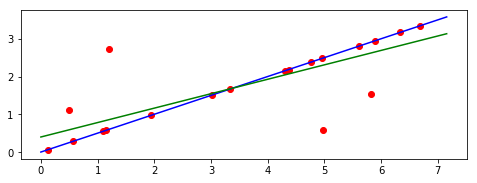

In [18]:
import pylab as pl
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

v = np.array([2, 1])
v = v / np.linalg.norm(v)
ps = np.array([np.random.rand()*8*v for _ in range(15)] +
              [np.random.rand(2)*8*v for _ in range(4)])

mean = sum(ps) / len(ps)
pca = PCA(n_components=1).fit(ps)
v2 = pca.components_[0]
ort2 = np.array([-v2[1], v2[0]])

ymin, ymax = mean[1] + (np.array([0, 8*v[0]]) - mean[0])/v2[0]*v2[1]
pl.figure(figsize=(8, ymax-ymin))
x, y = ps.transpose()
pl.scatter(x, y, c='red')
pl.plot([0, 8*v[0]], [0, 8*v[1]], c="blue")
pl.plot([0, 8*v[0]], [ymin, ymax], c="green")
print("\draw[greenTikz, very thick] (0, %.3f) -- (%.3f, %.3f);" % (ymin, 8*v[0], ymax))
print("\draw[blue, very thick] (0, 0) -- (%.3f, %.3f);" % (8*v[0], 8*v[1]))
for p in ps:
    print("\draw[fill=red] (%.3f, %.3f) circle (0.15);" % (p[0], p[1]))
pl.show()

## Kernel

<Figure size 432x432 with 0 Axes>

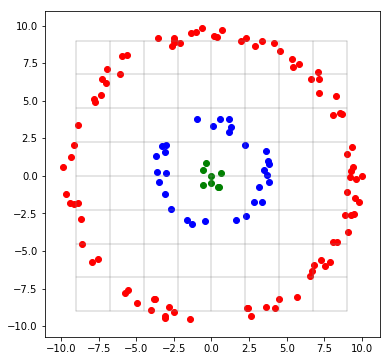

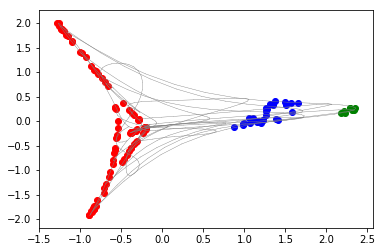

In [232]:
import pylab as pl
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
pl.figure(figsize=(6, 6))

ns = [8, 30, 90]
ras = [0, 3, 9]
nn = ns[0] + ns[1]
N = sum(ns)
th = np.random.rand(N)*2*np.pi
rs = np.random.rand(N) + sum([[ras[i]]*ns[i] for i in range(3)], [])
ps = (rs * [np.cos(th), np.sin(th)]).transpose()

xg = [-ras[-1] + i * ras[-1]/4 for i in range(9)]

ks = [[np.exp(-((a[0] - b[0])**2 + (a[1] - b[1])**2) / 10) for b in ps] for a in ps]
sl = [sum(l) / N for l in ks]
st = sum(sl) / N
ks = np.array([[ks[i][j] - sl[i] - sl[j] + st for j in range(N)] for i in range(N)])
pca = PCA(n_components=2).fit(ks)
U = pca.components_.transpose()
t = ks.dot(U)

F_NAME = "temp"
file = open(F_NAME, "w")
pl.figure(figsize=(6, 6))
colors = ["black"]*3
km = KMeans(n_clusters=3, n_init=30).fit([[a[0]] for a in t])
lab = km.labels_
colors[lab[0]] = "green"
colors[lab[ns[0]]] = "blue"
colors[lab[-1]] = "red"
bo = ras[-1]
for x in xg:
    pl.plot([-bo, bo], [x, x], c='gray', linewidth=0.4)
    pl.plot([x, x], [-bo, bo], c='gray', linewidth=0.4)
    file.write("\\draw[gray!40] (%.3f, %.3f) -- (%.3f, %.3f);\n" % (-bo, x, bo, x))
    file.write("\\draw[gray!40] (%.3f, %.3f) -- (%.3f, %.3f);\n" % (x, -bo, x, bo))
for i in range(3):
    inds = [j for j in range(len(lab)) if lab[j] == i]
    x, y = ps[inds].transpose()
    pl.scatter(x, y, c=colors[i])
    col = "greenTikz" if colors[i] == "green" else colors[i]
    for j in range(len(x)):
        file.write("\\node[%s] at (%.3f, %.3f) {$\\bullet$};\n" % (col, x[j], y[j]))
pl.show()
file.close()

def proj(a):
    ak = [np.exp(-((a[0] - b[0])**2 + (a[1] - b[1])**2) / 10) for b in ps]
    sa = sum(ak)
    ak = [ak[i] - sa - sl[i] + st for i in range(N)]
    return np.array([ak]).dot(U)[0]

F_NAME = "temp"
file = open(F_NAME, "w")
tt = t.transpose()
xg2 = [-ras[-1] + i * ras[-1]/15 for i in range(31)]
for x in xg:
    a = proj([-bo, x])
    file.write("\\draw[gray!40] (%.3f, %3.f)" % (a[0], a[1]))
    for y in xg2[1:]:
        b = proj([y, x])
        pl.plot([a[0], b[0]], [a[1], b[1]], c='gray', linewidth=0.4)
        a = b
        file.write(" -- (%.3f, %.3f)" % (a[0], a[1]))
    file.write(";\n")
    a = proj([x, -bo])
    file.write("\\draw[gray!40] (%.3f, %3.f)" % (a[0], a[1]))
    for y in xg2[1:]:
        b = proj([x, y])
        pl.plot([a[0], b[0]], [a[1], b[1]], c='gray', linewidth=0.4)
        a = b
        file.write(" -- (%.3f, %.3f)" % (a[0], a[1]))
    file.write(";\n")
pl.scatter(tt[0][:ns[0]], tt[1][:ns[0]], c="g")
for p in t[:ns[0]]:
    file.write("\\node[greenTikz] at (%.3f, %.3f) {$\\bullet$};\n" % (p[0], p[1]))
pl.scatter(tt[0][ns[0]:nn], tt[1][ns[0]:nn], c="b")
for p in t[ns[0]:nn]:
    file.write("\\node[blue] at (%.3f, %.3f) {$\\bullet$};\n" % (p[0], p[1]))
pl.scatter(tt[0][nn:], tt[1][nn:], c="r")
for p in t[nn:]:
    file.write("\\node[red] at (%.3f, %.3f) {$\\bullet$};\n" % (p[0], p[1]))
pl.show()
file.close()

# Chapitre 5

## Monge

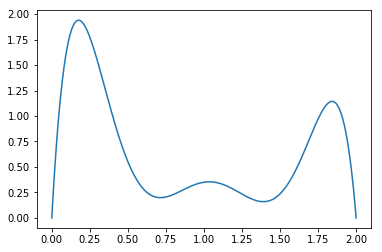

        6         5         4         3         2
-13.61 x + 84.24 x - 200.7 x + 229.9 x - 126.6 x + 27.21 x


In [9]:
import pylab as pl
from scipy.interpolate import lagrange
import numpy as np
%matplotlib inline

x0 = [0, 0.4, 0.7, 1, 1.4, 1.7, 2]
y0 = [0, 1, 0.2, 0.35, 0.16, 0.8, 0]

P = lagrange(x0, y0)
x = np.arange(0, 2.01, 0.01)
y = P(x)
pl.plot(x, y)
pl.show()
print(P)

## Kantorovich

[[60.  0.  0.]
 [ 0.  0. 90.]
 [60. 90.  0.]]
\draw[->, greenTikz, ultra thick] (5.20, 3.65) -- node[black] {60} (3.96, 3.47);
\fill[red] (5.20, 3.65) circle (0.136) node[black] {60};
\fill[blue] (3.65, 3.42) circle (0.313) node[black] {120};
\draw[->, greenTikz, ultra thick] (6.69, 0.87) -- node[black] {90} (5.21, 1.91);
\fill[red] (6.69, 0.87) circle (0.221) node[black] {90};
\fill[blue] (0.33, 0.18) circle (0.221) node[black] {90};
\draw[->, greenTikz, ultra thick] (3.73, 0.65) -- node[black] {60} (3.66, 3.11);
\draw[->, greenTikz, ultra thick] (3.73, 0.65) -- node[black] {90} (0.55, 0.21);
\fill[red] (3.73, 0.65) circle (0.409) node[black] {150};
\fill[blue] (5.03, 2.04) circle (0.221) node[black] {90};


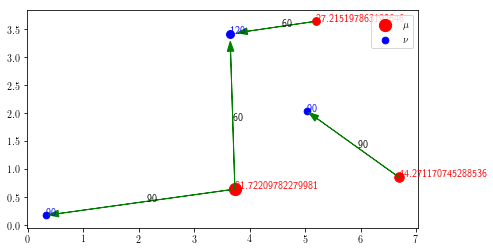

In [36]:
import ot
import numpy as np
import pylab as pl
%matplotlib inline

pl.figure(figsize=(7, 4))

px = np.array([60, 90, 150])
py = np.array([120, 90, 90])
x = np.random.random((3, 2)) * ([[7, 4]] * 3)
y = np.random.random((3, 2)) * ([[7, 4]] * 3)
px = px
py = py
C = [[np.linalg.norm(a-b) for b in y] for a in x]
T = ot.emd(px, py, C)
print(T)

xx, xy = x.transpose()
yx, yy = y.transpose()
pl.rc('text', usetex=True)
for i in range(3):
    for j in range(3):
        if T[i][j] > 0:
            dx, dy = yx[j]-xx[i], yy[j]-xy[i]
            l = (dx*dx + dy*dy)**0.5
            dx *= (l - 0.001*py[j]**1.2) / l
            dy *= (l - 0.001*py[j]**1.2) / l
            val = int(T[i][j]+0.5)
            print("\\draw[->, greenTikz, ultra thick] (%.2f, %.2f) -- node[black] {%d} (%.2f, %.2f);"
                  % (xx[i], xy[i], val, xx[i]+dx, xy[i]+dy))
            pl.arrow(xx[i], xy[i], dx, dy, color="green", head_width=0.12)
            pl.text(xx[i]+0.5*dx, xy[i]+0.5*dy, str(val))
    val, si = int(px[i]+0.5), 0.2*px[i]**1.2
    print("\\fill[red] (%.2f, %.2f) circle (%.3f) node[black] {%d};" % (xx[i], xy[i], si/200, val))
    rd = pl.scatter([xx[i]], [xy[i]], color='red', label=r'$\mu$', s=val)
    pl.text(xx[i], xy[i], str(si), color='red')
    val, si = int(py[i]+0.5), 0.2*py[i]**1.2
    print("\\fill[blue] (%.2f, %.2f) circle (%.3f) node[black] {%d};" % (yx[i], yy[i], si/200, val))
    bd = pl.scatter([yx[i]], [yy[i]], color='blue', label=r'$\nu$', s=si)
    pl.text(yx[i], yy[i], str(val), color='blue')

pl.legend(handles=[rd, bd])
pl.show()

## Interpolation 1D

\fill[red] (0.000, 0.000) -- (0.050, 0.403) -- (0.100, 0.752) -- (0.150, 1.051) -- (0.200, 1.302) -- (0.250, 1.509) -- (0.300, 1.676) -- (0.350, 1.806) -- (0.400, 1.902) -- (0.450, 1.967) -- (0.500, 2.004) -- (0.550, 2.016) -- (0.600, 2.006) -- (0.650, 1.976) -- (0.700, 1.929) -- (0.750, 1.868) -- (0.800, 1.794) -- (0.850, 1.710) -- (0.900, 1.618) -- (0.950, 1.521) -- (1.000, 1.419) -- (1.050, 1.315) -- (1.100, 1.211) -- (1.150, 1.108) -- (1.200, 1.008) -- (1.250, 0.912) -- (1.300, 0.822) -- (1.350, 0.738) -- (1.400, 0.662) -- (1.450, 0.595) -- (1.500, 0.537) -- (1.550, 0.490) -- (1.600, 0.455) -- (1.650, 0.431) -- (1.700, 0.419) -- (1.750, 0.420) -- (1.800, 0.435) -- (1.850, 0.462) -- (1.900, 0.503) -- (1.950, 0.556) -- (2.000, 0.623) -- (2.050, 0.703) -- (2.100, 0.796) -- (2.150, 0.900) -- (2.200, 1.017) -- (2.250, 1.144) -- (2.300, 1.281) -- (2.350, 1.428) -- (2.400, 1.584) -- (2.450, 1.746) -- (2.500, 1.915) -- (2.550, 2.089) -- (2.600, 2.267) -- (2.650, 2.447) -- (2.700, 2.627) --

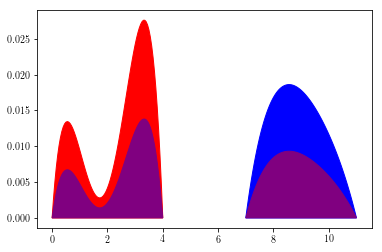

\fill[red] (0.000, 0.000) -- (0.050, 0.403) -- (0.100, 0.752) -- (0.150, 1.051) -- (0.200, 1.302) -- (0.250, 1.509) -- (0.300, 1.676) -- (0.350, 1.806) -- (0.400, 1.902) -- (0.450, 1.967) -- (0.500, 2.004) -- (0.550, 2.016) -- (0.600, 2.006) -- (0.650, 1.976) -- (0.700, 1.929) -- (0.750, 1.868) -- (0.800, 1.794) -- (0.850, 1.710) -- (0.900, 1.618) -- (0.950, 1.521) -- (1.000, 1.419) -- (1.050, 1.315) -- (1.100, 1.211) -- (1.150, 1.108) -- (1.200, 1.008) -- (1.250, 0.912) -- (1.300, 0.822) -- (1.350, 0.738) -- (1.400, 0.662) -- (1.450, 0.595) -- (1.500, 0.537) -- (1.550, 0.490) -- (1.600, 0.455) -- (1.650, 0.431) -- (1.700, 0.419) -- (1.750, 0.420) -- (1.800, 0.435) -- (1.850, 0.462) -- (1.900, 0.503) -- (1.950, 0.556) -- (2.000, 0.623) -- (2.050, 0.703) -- (2.100, 0.796) -- (2.150, 0.900) -- (2.200, 1.017) -- (2.250, 1.144) -- (2.300, 1.281) -- (2.350, 1.428) -- (2.400, 1.584) -- (2.450, 1.746) -- (2.500, 1.915) -- (2.550, 2.089) -- (2.600, 2.267) -- (2.650, 2.447) -- (2.700, 2.627) --

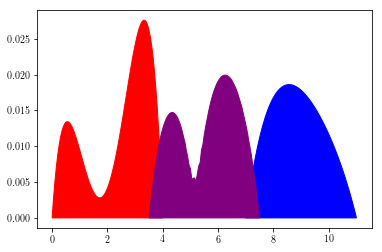

In [83]:
import pylab as pl
from scipy.interpolate import lagrange
import numpy as np
import ot
%matplotlib inline

def random_dis(x):
    x0 = np.concatenate((np.random.random(3)*4, [0, 4]))
    y0 = np.concatenate((np.random.random(3), [0, 0]))
    P = lagrange(x0, y0)
    y = abs(P(x))
    y = y / sum(y)
    return y

x = np.arange(0, 4.05, 0.05)
y0 = random_dis(x)
y1 = random_dis(x)

def aff(x, y, c):
    pl.fill(x, y, color=c)
    print(f'\\fill[{c}] {" -- ".join(["(%.3f, %.3f)" % (x[i], y[i]*150) for i in range(len(x))])};')
aff(x, y0, 'red')
aff(x+7, y1, 'blue')
aff(x, y0/2, 'purple')
aff(x+7, y1/2, 'purple')
pl.show()

M = ot.utils.dist0(len(y0))
M /= M.max()
bar = ot.barycenter(np.array((y0, y1)).T, M, 1e-4)
bar[0] = bar[-1] = 0
aff(x, y0, 'red')
aff(x+7, y1, 'blue')
aff(x+3.5, bar, 'purple')
pl.show()

## Polytope

\draw[blue] (0.1420, 0.1407) -- (0.5970, -0.1407);
\node[red] at (0.3695, 0.0000) {$ullet$};
\draw[black] (0.2138, 0.1516) -- (0.2607, 0.2275);
\fill[brown!40] (0.4503, 0.1444) -- (0.2251, 0.1444) -- (0.3695, 0.0000) -- (0.4503, -0.0000);
\fill[greenTikz!40] (0.3827, 0.0946) -- (0.3827, 0.1104) -- (0.3804, 0.1148) -- (0.3759, 0.1206) -- (0.3692, 0.1263) -- (0.3602, 0.1307) -- (0.3556, 0.1321) -- (0.3489, 0.1336) -- (0.3264, 0.1336) -- (0.3219, 0.1321) -- (0.3151, 0.1278) -- (0.3129, 0.1234) -- (0.3129, 0.1191) -- (0.3151, 0.1133) -- (0.3241, 0.1018) -- (0.3444, 0.0888) -- (0.3534, 0.0859) -- (0.3714, 0.0859) -- (0.3804, 0.0917);
\node[blue] at (0.3444, 0.0888) {$ullet$};
\node[greenTikz] at (0.3489, 0.1119) {$ullet$};


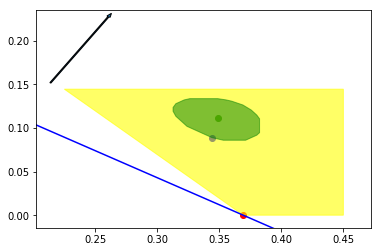

In [70]:
import numpy as np
import pylab as pl
from scipy.spatial import HalfspaceIntersection, ConvexHull
from scipy.optimize import linprog
%matplotlib inline

mu = np.random.random(2)
nu = np.random.random(3)
mu /= sum(mu)
nu /= sum(nu)

def ent(P):
    res = 0
    for p in P.flatten():
        res -= p * np.log2(p)
    return res

def getP(a, b):
    na, nb = nu[0]-a, nu[1]-b
    res = [a, b, mu[0]-a-b, na, nb, mu[1]-na-nb]
    res = [max(v, 0.000001) for v in res]
    return np.array(res)

eq = np.array([[-1, 0, 0],
              [1, 0, -nu[0]],
              [0, -1, 0],
              [0, 1, -nu[1]],
              [-1, -1, nu[0]+nu[1]-mu[1]],
              [1, 1, -mu[0]]])
center = mu[0] * nu[:2]
hs = HalfspaceIntersection(eq, center)
inter = hs.intersections
vert = ConvexHull(inter).vertices
x0, x1 = min(inter.transpose()[0]), max(inter.transpose()[0])
y0, y1 = min(inter.transpose()[1]), max(inter.transpose()[1])
dx, dy = x1-x0, y1-y0
lt = (x0 - dx/20, y1 + dy/20)
diag = (dx*dx + dy*dy)**0.5

xs = np.random.random((2, 2))
ys = np.random.random((3, 2))
ds = [[np.linalg.norm(a-b) for b in ys] for a in xs]
Mdir = [0, 0]
for i in range(6):
    Mdir[0] += ds[i%2][i//2] * eq[i][0]
    Mdir[1] += ds[i%2][i//2] * eq[i][1]
Mdir = np.array(Mdir) * diag / np.linalg.norm(Mdir) / 3

A = eq[:, :-1]
b = -eq[:, -1:]
res = linprog(Mdir, A_ub=A, b_ub=b)
Mdir_ort = np.array([-Mdir[1], Mdir[0]])
l0, l1 = res.x[:2] + Mdir_ort*3, res.x[:2] - Mdir_ort*3

min_ent = (ent(mu) + ent(nu)) * 0.99
fsx, fsy = dx * 0.005, dy * 0.025
reg = []
for x in np.arange(center[0]-dx*0.3, center[0]+dx*0.3, dx*0.01):
    for y in np.arange(center[1]-dy*0.3, center[1]+dy*0.3, dy*0.01):
        if ent(getP(x, y)) > min_ent:
            reg.append([x, y])
reg = np.array(reg)
vertr = ConvexHull(reg).vertices
reg = reg[vertr].transpose()
mind = float('inf')
i_min = -1
for i in range(len(reg[0])):
    d = reg[0][i]*Mdir[0] + reg[1][i]*Mdir[1]
    if d < mind:
        i_min, mind = i, d

pl.xlim(min(x0+Mdir[0], x0)-dx/10, x1+dx/10)
pl.ylim(y0-dy/10, max(y1, y1+Mdir[1])+dy/10)

pl.plot([l0[0], l1[0]], [l0[1], l1[1]], "blue")
print("\\draw[blue, thick] (%.4f, %.4f) -- (%.4f, %.4f);" % (l0[0], l0[1], l1[0], l1[1]))
pl.arrow(lt[0], lt[1], Mdir[0], Mdir[1])
print("\\draw[black, ->, thick] (%.4f, %.4f) -- (%.4f, %.4f);" % (lt[0], lt[1], lt[0]+Mdir[0], lt[1]+Mdir[1]))
pl.fill(inter[vert, 0], inter[vert, 1], color='yellow', alpha=0.6)
print(f"\\fill[brown!40] {' -- '.join(['(%.4f, %.4f)' % (inter[i][0], inter[i][1]) for i in vert])};")
pl.fill(reg[0], reg[1], color='green', alpha=0.5)
print(f"\\fill[greenTikz!40] {' -- '.join(['(%.4f, %.4f)' % (reg[0][i], reg[1][i]) for i in range(len(reg[0]))])};")
pl.scatter([reg[0][i_min]], [reg[1][i_min]], color='blue')
print("\\node[blue] at (%.4f, %.4f) {$\\bullet$};" % (reg[0][i_min], reg[1][i_min]))
pl.scatter([center[0]], [center[1]], color="green")
print("\\node[greenTikz] at (%.4f, %.4f) {$\\bullet$};" % (center[0], center[1]))
pl.scatter([res.x[0]], [res.x[1]], color='red')
print("\\node[red] at (%.4f, %.4f) {$\\bullet$};" % (res.x[0], res.x[1]))
pl.show()

# Chapitre 7

## Margin

\draw[dashed] (6.98, -2.04) -- (6.15, -3.45);
\draw[dashed] (1.61, -4.58) -- (3.26, -1.76);
\draw[very thick, ->] (3.52, -1.91) -- (5.54, 1.54);
\draw[ultra thick] (0.07, 0.12) -- (7.76, -4.56);
\draw[fill=black] (6.98, -2.04) circle (0.35);
\draw[fill=black] (6.53, -2.05) circle (0.35);
\draw[fill=black] (8.35, -0.75) circle (0.35);
\draw[fill=black] (5.17, -1.19) circle (0.35);
\draw[fill=black] (2.47, -0.50) circle (0.35);
\draw[fill=black] (5.02, 1.56) circle (0.35);
\draw[fill=black] (4.55, 1.77) circle (0.35);
\draw[fill=black] (2.47, 0.02) circle (0.35);
\draw[fill=white] (1.77, -1.68) circle (0.35);
\draw[fill=white] (1.61, -4.58) circle (0.35);
\draw[fill=white] (0.83, -1.91) circle (0.35);
\draw[fill=white] (-0.64, -1.40) circle (0.35);
\draw[fill=white] (3.62, -3.25) circle (0.35);
\draw[fill=white] (3.84, -3.04) circle (0.35);
\draw[fill=white] (2.06, -4.80) circle (0.35);
\draw[fill=white] (0.84, -3.90) circle (0.35);


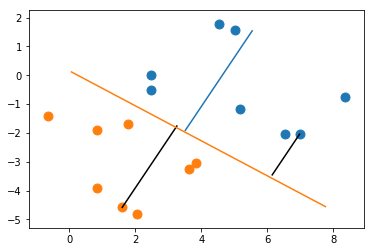

In [63]:
import pylab as pl
import numpy as np
from sklearn.svm import SVC
%matplotlib inline

N = 8
v = np.array([2, -1])
v = v / np.linalg.norm(v)
ort = np.array([-v[1], v[0]])
ps = np.array([(2+np.random.rand()*6)*v + (0.5+np.random.rand()*3.5)*ort for _ in range(N)])
ps2 = np.array([np.random.rand()*6*v - (0.5+np.random.rand()*3)*ort for _ in range(N)])

clsf = SVC(kernel='linear')
X = np.concatenate((ps, ps2), axis=0)
y = [-1]*N + [1]*N
clsf.fit(X, y)
w = clsf.coef_[0]
b = clsf.intercept_[0]
b /= np.linalg.norm(w)
w = w / np.linalg.norm(w)
wo = np.array([-w[1], w[0]])

o = -b * w
mid = o + 4 * wo
arrow = mid - 4 * w

def marge(x):
    xw = x.dot(w)
    p = x + (-b - xw) * w
    pl.plot([x[0], p[0]], [x[1], p[1]], color='black')
    print("\\draw[dashed] (%.2f, %.2f) -- (%.2f, %.2f);" % (x[0], x[1], p[0], p[1]))
marge(ps[0])
marge(ps2[1])
pl.plot([mid[0], arrow[0]], [mid[1], arrow[1]])
print("\\draw[very thick, ->] (%.2f, %.2f) -- (%.2f, %.2f);" % (mid[0], mid[1], arrow[0], arrow[1]))
pl.plot([o[0], wo[0]*9], [o[1], wo[1]*9])
print("\\draw[ultra thick] (%.2f, %.2f) -- (%.2f, %.2f);" % (o[0], o[1], wo[0]*9, wo[1]*9))
x, y = ps.transpose()
pl.scatter(x, y, s=80)
for x, y in ps:
    print("\\draw[fill=black] (%.2f, %.2f) circle (0.35);" % (x, y))
x, y = ps2.transpose()
pl.scatter(x, y, s=80)
for x, y in ps2:
    print("\\draw[fill=white] (%.2f, %.2f) circle (0.35);" % (x, y))

pl.show()

[0.70473418]
\draw[dashed] (7.21, -2.52) -- (5.32, -4.38);
\draw[dashed] (-0.72, -1.65) -- (0.97, 0.02);
\draw[very thick, ->] (3.31, -2.35) -- (6.16, 0.46);
\draw[ultra thick] (0.50, 0.50) -- (6.33, -6.40);
\draw[fill=black] (7.21, -2.52) circle (0.35);
\draw[fill=black] (3.71, -0.84) circle (0.35);
\draw[fill=black] (6.90, -0.77) circle (0.35);
\draw[fill=black] (6.90, -0.94) circle (0.35);
\draw[fill=black] (6.13, 0.89) circle (0.35);
\draw[fill=black] (2.79, -0.65) circle (0.35);
\draw[fill=black] (3.34, 1.65) circle (0.35);
\draw[fill=black] (7.90, -1.73) circle (0.35);
\draw[fill=white] (1.38, -3.82) circle (0.35);
\draw[fill=white] (-0.72, -1.65) circle (0.35);
\draw[fill=white] (1.07, -3.25) circle (0.35);
\draw[fill=white] (2.68, -5.13) circle (0.35);
\draw[fill=white] (3.80, -5.36) circle (0.35);
\draw[fill=white] (2.67, -5.23) circle (0.35);
\draw[fill=white] (0.80, -2.22) circle (0.35);
\draw[fill=white] (1.52, -1.91) circle (0.35);


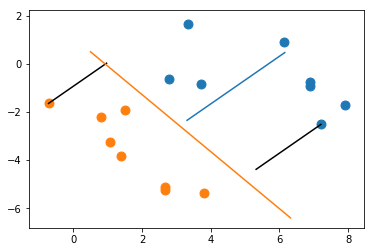

In [56]:
print(clsf.intercept_)
b = -clsf.intercept_[0]
b /= np.linalg.norm(w)
w = w / np.linalg.norm(w)
wo = np.array([-w[1], w[0]])

o = b * w
mid = o + 4 * wo
arrow = mid - 4 * w

def marge(x):
    xw = x.dot(w)
    p = x + (b - xw) * w
    pl.plot([x[0], p[0]], [x[1], p[1]], color='black')
    print("\\draw[dashed] (%.2f, %.2f) -- (%.2f, %.2f);" % (x[0], x[1], p[0], p[1]))
marge(ps[0])
marge(ps2[1])
pl.plot([mid[0], arrow[0]], [mid[1], arrow[1]])
print("\\draw[very thick, ->] (%.2f, %.2f) -- (%.2f, %.2f);" % (mid[0], mid[1], arrow[0], arrow[1]))
pl.plot([o[0], wo[0]*9], [o[1], wo[1]*9])
print("\\draw[ultra thick] (%.2f, %.2f) -- (%.2f, %.2f);" % (o[0], o[1], wo[0]*9, wo[1]*9))
x, y = ps.transpose()
pl.scatter(x, y, s=80)
for x, y in ps:
    print("\\draw[fill=black] (%.2f, %.2f) circle (0.35);" % (x, y))
x, y = ps2.transpose()
pl.scatter(x, y, s=80)
for x, y in ps2:
    print("\\draw[fill=white] (%.2f, %.2f) circle (0.35);" % (x, y))

pl.show()

## Multplie hyperplanes

In [64]:
x, y = 3.5, -2
th1, th2 = -0.3, -0.6
for i in range(7):
    t = th1 + (th2 - th1) * i / 6
    c, s = 5*np.cos(t), 5*np.sin(t)
    print("\draw[red, very thick] (%.2f, %.2f) -- (%.2f, %.2f);" % (x-c, y-s, x+c, y+s))

\draw[red, very thick] (-1.28, -0.52) -- (8.28, -3.48);
\draw[red, very thick] (-1.20, -0.29) -- (8.20, -3.71);
\draw[red, very thick] (-1.11, -0.05) -- (8.11, -3.95);
\draw[red, very thick] (-1.00, 0.17) -- (8.00, -4.17);
\draw[red, very thick] (-0.89, 0.40) -- (7.89, -4.40);
\draw[red, very thick] (-0.76, 0.61) -- (7.76, -4.61);
\draw[red, very thick] (-0.63, 0.82) -- (7.63, -4.82);
